In [2]:
import os

In [ ]:
import pandas as pd
import numpy as np

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


In [67]:
df = pd.read_csv('../data/isbndb-caribbean-books.csv', encoding= 'latin1')
df

,title,title_long,subjects,binding,date_published,publisher,pages,synopsis,image,isbn,isbn10,isbn13,language,authors,msrp,edition
0,Britain's Black Debt: Reparations for Caribbea...,Britain's Black Debt: Reparations for Caribbea...,History\nAfrica\nWest Africa\nAmericas\nCaribb...,Paperback,2/25/2013,University Press of the West Indies,248.0,Since the mid-nineteenth-century abolition of ...,https://images.isbndb.com/covers/26/86/9789766...,976640268X,976640268X,9789766402686,en,Hilary McD. Beckles,NaN,NaN
1,Maharani's Misery: Narratives of a Passage fro...,Maharani's Misery: Narratives of a Passage fro...,History\nAmericas\nCaribbean & West Indies,Paperback,10/1/2002,University Press of the West Indies,160.0,Maharani?s Misery sheds new light on the ordea...,https://images.isbndb.com/covers/12/14/9789766...,9766401217,9766401217,9789766401214,en,Verene A. Shepherd,NaN,NaN
2,The Birth of Caribbean Civilization: A Century...,The Birth of Caribbean Civilization: A Century...,Politics & Social Sciences\nSocial Sciences\nH...,Paperback,2004-07,James Currey Ltd,500.0,"For more than a century, Caribbean intellectua...",https://images.isbndb.com/covers/87/20/9780852...,852558724,852558724,9780852558720,en,NaN,NaN,NaN
3,The Lonely Londoners (Longman Caribbean Writer...,The Lonely Londoners (Longman Caribbean Writer...,Literature & Fiction\nHistory & Criticism\nMov...,Paperback,1/11/1989,Longman,141.0,Looking for a better life a group of West Indi...,https://images.isbndb.com/covers/26/45/9780582...,582642647,582642647,9780582642645,en,Samuel Selvon,22.80,15th Printing
4,The Oxford Book of Caribbean Short Stories: Re...,The Oxford Book of Caribbean Short Stories: Re...,Literature & Fiction\nHistory & Criticism\nReg...,Paperback,3/21/2002,Oxford University Press,476.0,"Some of the freshest, most vital, and diverse ...",https://images.isbndb.com/covers/22/93/9780192...,192802291,192802291,9780192802293,en,NaN,29.95,Reissue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Caribbean Narrative: An Anthology of West Indi...,Caribbean Narrative: An Anthology of West Indi...,Subjects,Paperback,1966-06,Heinemann,256.0,NaN,https://images.isbndb.com/covers/22/18/9780435...,435982214,435982214,9780435982218,en,O.R. Dathrone,NaN,NaN
5996,"Caribbean Globalizations, 1492 to the Present Day","Caribbean Globalizations, 1492 to the Present Day",Literature & Fiction\nHistory & Criticism\nReg...,Paperback,3/1/2021,Liverpool University Press,281.0,Caribbean Globalizations explores the relation...,https://images.isbndb.com/covers/90/56/9781800...,180034905X,180034905X,9781800349056,en,NaN,NaN,NaN
5997,"The Caribbean;: The story of our sea of destiny,","The Caribbean;: The story of our sea of destiny,",Subjects,Hardcover,1969,Negro Universities Press,361.0,NaN,https://images.isbndb.com/covers/71/94/9780837...,083712719X,083712719X,9780837127194,en,Walter Adolphe Roberts,NaN,New ed of 1940 ed
5998,To the Caribbean and Back: Sailing the Atlanti...,To the Caribbean and Back: Sailing the Atlanti...,Sports & Outdoors\nWater Sports\nSailing\nTravel,Paperback,2020,Independently published,337.0,"""Ballard describes his book as ?a tale of comp...",https://images.isbndb.com/covers/22/53/9781671...,1671122259,1671122259,9781671122253,en,Richard Ballard,NaN,NaN


In [5]:
# Drop columns, missing publishers, if both synopsis and subject are missing. df_match to retrieve publishers. df_model to train model without publishers data.
df_match = df.copy()
df_match.drop_duplicates(subset = 'title', inplace=True)
df_match.drop_duplicates(subset = 'synopsis', inplace=True)
df_match = df_match[~df_match['publisher'].str.contains("ndependent", na=False)]
df_match.dropna(subset=['subjects', 'synopsis'], inplace=True, how='all') #missing both subject and synopsis
df_match.dropna(subset='publisher', inplace=True) #missing publisher
df_match.drop(['title_long', 'binding', 'pages', 'image', 'isbn', 'isbn10', 'isbn13', 'authors', 'msrp', 'edition', 'date_published', 'language'], axis=1, inplace=True)
df_model = df_match.copy()
df_model.drop('publisher', axis=1, inplace=True) #model wont use publisher data

In [6]:
[df_model.isna().sum(), df_model.info]

[title         0
 subjects    113
 synopsis      1
 dtype: int64,
 <bound method DataFrame.info of                                                   title  \
 0     Britain's Black Debt: Reparations for Caribbea...   
 1     Maharani's Misery: Narratives of a Passage fro...   
 2     The Birth of Caribbean Civilization: A Century...   
 3     The Lonely Londoners (Longman Caribbean Writer...   
 4     The Oxford Book of Caribbean Short Stories: Re...   
 ...                                                 ...   
 5989  The Dominican Republic: A Caribbean Crucible, ...   
 5991  Women At Sea: Travel Writing and the Margins o...   
 5992  Culture and Customs of Argentina (Culture and ...   
 5994      Dilemmas of Deokie (Caribbean Writers Series)   
 5999  Pirates of the Caribbean: Dead Man's Chest Dea...   
 
                                                subjects  \
 0     History\nAfrica\nWest Africa\nAmericas\nCaribb...   
 1            History\nAmericas\nCaribbean & West Indies   


In [7]:
# filling missing data
df_model['subjects'].fillna(value='subject', inplace=True) # uncategorized
df_model['synopsis'].fillna(value='', inplace=True) # empty string

In [8]:
#Text Preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
import sys
!{sys.executable} -m pip install contractions
import contractions

[nltk_data] Downloading package punkt to /Users/nular/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/nular/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nular/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nular/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
def preprocess(s):
    s=str(s)
    s = s.lower() # lowercase
    s = contractions.fix(s) # expand contractions
    s = re.sub(r'\\n', ' ', s) # remove \n
    s = re.sub(r'http\S+', '', s) # remove url
    s = re.sub(r'<.*?>', '', s) # remove html
    s = re.sub(r'\d+', '', s) # remove numbers
    s = re.sub(r'[^\w\s]', ' ', s) # remove punctuation and special characters
    s = word_tokenize(s) # tokenize
    s = [w for w in s if w not in set(stopwords.words('english'))] # stop words
    s = [stemmer.stem(w) for w in s] # stemming
    return " ".join(s) # white spaces

In [20]:
df_clean = df_model.copy()
df_clean['title'] = df_clean['title'].apply(lambda s:preprocess(s)).copy()
df_clean['subjects'] = df_clean['subjects'].apply(lambda s:preprocess(s)).copy()
df_clean['synopsis'] = df_clean['synopsis'].apply(lambda s:preprocess(s)).copy()

In [21]:
df_model=df_clean.copy()
df_model

,title,subjects,synopsis
0,britain black debt repar caribbean slaveri nat...,histori africa west africa america caribbean w...,sinc mid nineteenth centuri abolit slaveri cal...
1,maharani miseri narrat passag india caribbean,histori america caribbean west indi,maharani miseri shed new light ordeal indentur...
2,birth caribbean civil centuri idea cultur iden...,polit social scienc social scienc human geographi,centuri caribbean intellectu creat substanti b...
3,lone london longman caribbean writer seri,literatur fiction histori critic movement peri...,look better life group west indian face harsh ...
4,oxford book caribbean short stori reissu oxfor...,literatur fiction histori critic region cultur...,freshest vital divers new literatur written tw...
...,...,...,...
5989,dominican republ caribbean crucibl second edit,histori america caribbean west indi polit soci...,much occur dominican republ sinc first edit cr...
5991,women sea travel write margin caribbean discours,busi money econom econom polici develop litera...,cross dress pirat servant slave women play vit...
5992,cultur custom argentina cultur custom latin am...,histori america south america polit social sci...,argentina one dynam societi latin america know...
5994,dilemma deoki caribbean writer seri,educ teach school teach,set outskirt san fernando trinidad dilemma deo...


In [22]:
# TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer # word2vec or glove or bert
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=.01, max_df=.99) # 3 ngrams

In [ ]:
#merged TF IDF
df_model['merged'] = df_model['title'] + ' ' + df_model['subjects'] + ' ' + df_model['synopsis']
tfidf.fit(df_model['merged'])


TfidfVectorizer(max_df=0.99, min_df=0.01, ngram_range=(1, 2))

In [24]:
# Apply TF-IDF to each column
def tfidfer(df_col):
  matrix = tfidf.transform(df_col)
  return pd.DataFrame(matrix.toarray(), columns=tfidf.get_feature_names_out(), index = df_model.index)
title_tfidf = tfidfer(df_model['title'])
subject_tfidf = tfidfer(df_model['subjects'])
synopsis_tfidf = tfidfer(df_model['synopsis'])
tfidf_df = pd.concat([title_tfidf,subject_tfidf,synopsis_tfidf], axis=1)

In [25]:
tfidf_df

,abil,abl,aboard,academ,accept,access,acclaim,accommod,accompani,account,...,write research,writer,writer seri,written,year,yet,york,young,young adult,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.056064,0.000000,0.064364,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.059653,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.119039,0.0,0.065381,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.051055,0.072744,0.0,0.000000,0.0,0.0
5991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.076279,0.0,0.000000,0.000000,0.096196,0.0,0.000000,0.0,0.0
5992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
5994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.103705,0.000000,0.0,0.000000,0.0,0.0


In [26]:
vector_df = tfidf_df.copy()

In [27]:
# Scaling
from sklearn.preprocessing import MaxAbsScaler
max_scaler = MaxAbsScaler()
max_df = max_scaler.fit(vector_df)
max_df = pd.DataFrame(max_scaler.transform(vector_df), columns=vector_df.columns, index=vector_df.index)
max_df

,abil,abl,aboard,academ,accept,access,acclaim,accommod,accompani,account,...,write research,writer,writer seri,written,year,yet,york,young,young adult,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.123454,0.000000,0.232330,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.139071,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.212326,0.0,0.143971,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.132630,0.262578,0.0,0.000000,0.0,0.0
5991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.136055,0.0,0.000000,0.000000,0.347229,0.0,0.000000,0.0,0.0
5992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
5994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.269405,0.000000,0.0,0.000000,0.0,0.0


In [28]:
scaled_df = max_df.copy()

In [29]:
prered_df = scaled_df.copy()
prered_df

,abil,abl,aboard,academ,accept,access,acclaim,accommod,accompani,account,...,write research,writer,writer seri,written,year,yet,york,young,young adult,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.123454,0.000000,0.232330,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.139071,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.212326,0.0,0.143971,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.132630,0.262578,0.0,0.000000,0.0,0.0
5991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.136055,0.0,0.000000,0.000000,0.347229,0.0,0.000000,0.0,0.0
5992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
5994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.269405,0.000000,0.0,0.000000,0.0,0.0


In [30]:
#SVD dimension reduction
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, algorithm='arpack') # algorithm arpack, n_iter inc # 2 or 3 comp
svd.fit(prered_df)

TruncatedSVD(algorithm='arpack', n_components=3)

In [31]:
svd_df = pd.DataFrame(svd.transform(prered_df), index=vector_df.index)
svd_df

,0,1,2
0,1.346608,-0.796759,-0.576336
1,0.684970,-0.387252,0.064021
2,1.264029,-0.819662,-0.449058
3,1.337477,1.493383,0.921649
4,0.581158,-0.343712,1.028833
...,...,...,...
5989,1.949068,0.795888,-0.536801
5991,1.387527,0.135447,0.294205
5992,1.316610,-0.720968,-0.364728
5994,0.424050,0.000512,0.502392


In [32]:
reduced_df=svd_df.copy()
reduced_df

,0,1,2
0,1.346608,-0.796759,-0.576336
1,0.684970,-0.387252,0.064021
2,1.264029,-0.819662,-0.449058
3,1.337477,1.493383,0.921649
4,0.581158,-0.343712,1.028833
...,...,...,...
5989,1.949068,0.795888,-0.536801
5991,1.387527,0.135447,0.294205
5992,1.316610,-0.720968,-0.364728
5994,0.424050,0.000512,0.502392


In [33]:
# Birch clustering
from sklearn.cluster import Birch # other methods

In [34]:
birch_model = Birch(threshold=0.01, n_clusters=25) # 25 to 50 to 100
birch_fit = birch_model.fit(reduced_df)
birch_predict = birch_model.predict(reduced_df)

In [35]:
fit = birch_fit
labels = fit.labels_
labels

array([18, 22, 18, ..., 18,  6,  6])

In [36]:
df_model['label'] = labels # get labels

In [37]:
predictions = birch_predict

In [38]:
import matplotlib.pyplot as plt

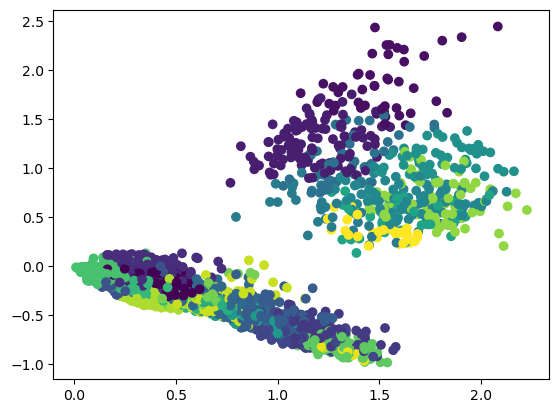

In [39]:
plt.scatter(reduced_df[0], reduced_df[1], c = predictions) # Plot clusters
plt.show()

In [40]:
# Clean and vectorize input
title_input = "How to Say Babylon"#df_model['title'].iloc[68]
subject_input = "Memoir Nonfiction Audiobook Biography Feminism Religion Biography Memoir Family Adult Poetry"#df_model['subjects'].iloc[68]
synopsis_input = "With echoes of Educated and Born a Crime, How to Say Babylon is the stunning story of the author’s struggle to break free of her rigid Rastafarian upbringing, ruled by her father’s strict patriarchal views and repressive control of her childhood, to find her own voice as a woman and poet.  Throughout her childhood, Safiya Sinclair’s father, a volatile reggae musician and militant adherent to a strict sect of Rastafari, became obsessed with her purity, in particular, with the threat of what Rastas call Babylon, the immoral and corrupting influences of the Western world outside their home. He worried that womanhood would make Safiya and her sisters morally weak and impure, and believed a woman’s highest virtue was her obedience.  In an effort to keep Babylon outside the gate, he forbade almost everything. In place of pants, the women in her family were made to wear long skirts and dresses to cover their arms and legs, head wraps to cover their hair, no make-up, no jewelry, no opinions, no friends. Safiya’s mother, while loyal to her father, nonetheless gave Safiya and her siblings the gift of books, including poetry, to which Safiya latched on for dear life. And as Safiya watched her mother struggle voicelessly for years under housework and the rigidity of her father’s beliefs, she increasingly used her education as a sharp tool with which to find her voice and break free. Inevitably, with her rebellion comes clashes with her father, whose rage and paranoia explodes in increasing violence. As Safiya’s voice grows, lyrically and poetically, a collision course is set between them.  How to Say Babylon is Sinclair’s reckoning with the culture that initially nourished but ultimately sought to silence her; it is her reckoning with patriarchy and tradition, and the legacy of colonialism in Jamaica. Rich in lyricism and language only a poet could evoke, How to Say Babylon is both a universal story of a woman finding her own power and a unique glimpse into a rarefied world we may know how to name, Rastafari, but one we know little about.'"#df_model['synopsis'].iloc[68]
def preprocess_transform(s):
  preprocessed = preprocess(s)
  transformed = tfidf.transform([preprocessed]).toarray()
  return transformed

In [41]:
clean_title_input = preprocess_transform(title_input)
clean_subject_input = preprocess_transform(subject_input)
clean_synopsis_input = preprocess_transform(synopsis_input)
input_df = pd.DataFrame(np.concatenate([clean_title_input, clean_subject_input, clean_synopsis_input], axis=1))
input_df

,0,1,2,3,4,5,6,7,8,9,...,5354,5355,5356,5357,5358,5359,5360,5361,5362,5363
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.053192,0.0,0.0,0.0,0.0,0.0


In [42]:
# scale input
input_df = max_scaler.transform(input_df)
input_df

/Users/nular/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.]])

In [43]:
# reduce dimensions of input
svd_input = svd.transform(input_df)
svd_input

/Users/nular/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but TruncatedSVD was fitted with feature names
  warnings.warn(


array([[ 0.25230564, -0.1700524 ,  0.24999357]])

In [44]:
red_input = svd_input

In [45]:
# predict test input
input_pred = birch_model.predict(red_input)[0]
input_pred

3

In [46]:
# check if test input matches exact same data point
#birch_predict[0]

In [47]:
#ValueError: X has 1763 features, but TruncatedSVD is expecting 5289 features as input.
#SVD requires same dimension of input as fit.
#So we use the same tfidf fit to maintain vocabulary size,
#transforming separately under the same fit, so the size is the same

In [48]:
# vector subset where label matches
subset = df_model[df_model['label'] == input_pred]
subset

,title,subjects,synopsis,merged,label
17,snorkel guid marin life florida caribbean bahama,histori america unit state scienc math natur e...,field guid illustr varieti fish coral inverteb...,snorkel guid marin life florida caribbean baha...,3
22,dictionari caribbean english usag,refer dictionari thesaurus english word langua...,dictionari caribbean english usag first attemp...,dictionari caribbean english usag refer dictio...,3
46,pirat must true stori black bart king caribbea...,histori america caribbean west indi militari n...,page turn tale brim adventur author richard sa...,pirat must true stori black bart king caribbea...,3
50,rastafari african caribbean worldview,religion spiritu,sensat headlin public drug traffick brutal vio...,rastafari african caribbean worldview religion...,3
73,reef coral identif florida caribbean bahama rd...,histori america unit state scienc math biolog ...,comprehens field guid ever publish visual iden...,reef coral identif florida caribbean bahama rd...,3
...,...,...,...,...,...
5883,scuba caribbean sea adventur underwat imag fac...,children book scienc natur work,scuba plung ocean depth come face face octopus...,scuba caribbean sea adventur underwat imag fac...,3
5945,someth fishi go search caribbean critter,scienc math biolog scienc anim natur ecolog fa...,know christma tree water realli worm know squi...,someth fishi go search caribbean critter scien...,3
5952,historia del diseno en america latina el carib...,art photographi decor art design design histor...,historia del diseo en amrica latina el carib h...,historia del diseno en america latina el carib...,3
5953,chameleon goggl kraken caribbean,romanc time travel,new york time bestsel author usa today bestsel...,chameleon goggl kraken caribbean romanc time t...,3


In [49]:
# get subset
sim_df = reduced_df.copy()
sim_subset = sim_df.loc[subset.index]
sim_subset

,0,1,2
17,0.292072,-0.164899,0.159189
22,0.445717,-0.106070,0.304820
46,0.491254,-0.299597,0.287224
50,0.391333,-0.164452,0.098246
73,0.350643,-0.160066,0.100031
...,...,...,...
5883,0.273045,-0.186857,0.155704
5945,0.334183,-0.135234,0.112452
5952,0.532214,-0.152021,0.118389
5953,0.224040,-0.166346,0.262278


In [50]:
# calculate cosine similarity within that cluster
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(red_input, sim_subset).T #input
similarity

array([[0.96803761],
       [0.95382375],
       [0.97412319],
       [0.88159651],
       [0.89720683],
       [0.96898144],
       [0.82088955],
       [0.65669371],
       [0.94271921],
       [0.83919779],
       [0.99033701],
       [0.81704766],
       [0.97860216],
       [0.94936923],
       [0.99866398],
       [0.77804597],
       [0.90750744],
       [0.95715051],
       [0.85781757],
       [0.89768969],
       [0.83120906],
       [0.92722452],
       [0.91187818],
       [0.98660983],
       [0.9918917 ],
       [0.98341948],
       [0.99856157],
       [0.81870617],
       [0.98952927],
       [0.99720143],
       [0.99778124],
       [0.99901714],
       [0.990672  ],
       [0.87668136],
       [0.99571616],
       [0.99199061],
       [0.99805514],
       [0.91314584],
       [0.91713132],
       [0.88616827],
       [0.8068845 ],
       [0.99263289],
       [0.75187705],
       [0.99428026],
       [0.88559735],
       [0.98462002],
       [0.9980038 ],
       [0.933

In [51]:
# append similarity to dataframe
subset['similarity'] = similarity
subset

/var/folders/63/qfkhcrwd7b72kqr1sr3jz6s80000gn/T/ipykernel_40552/570674592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['similarity'] = similarity


,title,subjects,synopsis,merged,label,similarity
17,snorkel guid marin life florida caribbean bahama,histori america unit state scienc math natur e...,field guid illustr varieti fish coral inverteb...,snorkel guid marin life florida caribbean baha...,3,0.968038
22,dictionari caribbean english usag,refer dictionari thesaurus english word langua...,dictionari caribbean english usag first attemp...,dictionari caribbean english usag refer dictio...,3,0.953824
46,pirat must true stori black bart king caribbea...,histori america caribbean west indi militari n...,page turn tale brim adventur author richard sa...,pirat must true stori black bart king caribbea...,3,0.974123
50,rastafari african caribbean worldview,religion spiritu,sensat headlin public drug traffick brutal vio...,rastafari african caribbean worldview religion...,3,0.881597
73,reef coral identif florida caribbean bahama rd...,histori america unit state scienc math biolog ...,comprehens field guid ever publish visual iden...,reef coral identif florida caribbean bahama rd...,3,0.897207
...,...,...,...,...,...,...
5883,scuba caribbean sea adventur underwat imag fac...,children book scienc natur work,scuba plung ocean depth come face face octopus...,scuba caribbean sea adventur underwat imag fac...,3,0.969402
5945,someth fishi go search caribbean critter,scienc math biolog scienc anim natur ecolog fa...,know christma tree water realli worm know squi...,someth fishi go search caribbean critter scien...,3,0.910656
5952,historia del diseno en america latina el carib...,art photographi decor art design design histor...,historia del diseo en amrica latina el carib h...,historia del diseno en america latina el carib...,3,0.851204
5953,chameleon goggl kraken caribbean,romanc time travel,new york time bestsel author usa today bestsel...,chameleon goggl kraken caribbean romanc time t...,3,0.997195


In [52]:
# top 5 similar, closest match
top_subset = subset.sort_values(by='similarity', ascending=False).head(5)
top_subset

,title,subjects,synopsis,merged,label,similarity
2549,brown girl ring antholog song game eastern car...,art photographi music music genr songbook,award win author alan lomax dedic life record ...,brown girl ring antholog song game eastern car...,3,0.999956
917,modern caribbean cuisin,subject,modern caribbean cuisin demonstr new direct ca...,modern caribbean cuisin subject modern caribbe...,3,0.999864
3994,tropic home eastern caribbean,art photographi photographi video architectur ...,happi sunni bi lingual english french translat...,tropic home eastern caribbean art photographi ...,3,0.999621
3234,song shade cashew coconut tree lullabi nurseri...,children book art music photographi music geog...,winner children africana book award caba song ...,song shade cashew coconut tree lullabi nurseri...,3,0.999529
4078,caribbean mcc tour west indi,busi money industri sport entertain sport outd...,predict england cricket team first ever seri w...,caribbean mcc tour west indi busi money indust...,3,0.999499


In [53]:
np.sum(subset['similarity']>.99990)

1

In [54]:
subset.shape

(531, 6)

In [55]:
top_index = top_subset.index
top_index

Index([2549, 917, 3994, 3234, 4078], dtype='int64')

In [56]:
top_titles = []
top_subjects = []
top_synopsis = []
top_publishers = []

In [57]:
def book_info(index):
  title = df_match.loc[index]['title']
  subjects = df_match.loc[index]['subjects']
  synopsis = df_match.loc[index]['synopsis']
  publisher = df_match.loc[index]['publisher']
  return title, subjects, synopsis, publisher

In [58]:
for i in range(len(top_index)):
  top_titles.append(book_info(top_index[i])[0])
  top_subjects.append(book_info(top_index[i])[1])
  top_synopsis.append(book_info(top_index[i])[2])
  top_publishers.append(book_info(top_index[i])[3])
  print(book_info(top_index[i])[0])

Brown Girl in the Ring: An Anthology of Song Games from the Eastern Caribbean
Modern Caribbean Cuisine
Tropical Homes of the Eastern Caribbean
Songs in the Shade of the Cashew and Coconut Trees: Lullabies and Nursery Rhymes from West Africa and the Caribbean
Through the Caribbean: The MCC Tour of the West Indies, 1959?1960


Prompt:

Using the input book information as a reference, compare and rank the similarity of books A, B, C, D, and E to the reference. Use literary analysis to evaluate each book based on thematic alignment, such as central conflict, character focus, and setting, and stylistic features such as narrative tone and diction. \n Provide a list of the respective publishers of the books in descending order of book similarity to the reference book with a 1-2 sentence justification for the ranking, citing specific aspects of the book information and synopsis that supports your assessment. Structure the response in a list, where each entry is formatted, with elaboration as necessary: \n (Rank number). (Publisher) \n Explanation: (Publisher) published (Title), a (Subject) book that is similar to your book because (Explanation). Therefore, your book appeals to (Publisher)'s sector of the market. \n \n Book Reference: \n Title: {title_input}. \n Subject: {subject_input} \n Synopsis: {synopsis_input} \n \n Book A: \n Title: {top_titles[0]} \n Subject: {top_subjects[0]} \n Synopsis: {top_synopsis[0]} \n Publisher: {top_publishers[0]} \n \n Book B: \n Title: {top_titles[1]} \n Subject: {top_subjects[1]} \n Synopsis: {top_synopsis[1]} \n Publisher: {top_publishers[1]} \n \n Book C: \n Title: {top_titles[2]} \n Subject: {top_subjects[2]} \n Synopsis: {top_synopsis[2]} \n Publisher: {top_publishers[2]} \n \n Book D: \n Title: {top_titles[3]} \n Subject: {top_subjects[3]} \n Synopsis: {top_synopsis[3]} \n Publisher: {top_publishers[3]} \n \n Book E: \n Title: {top_titles[4]} \n Subject: {top_subjects[4]} \n Synopsis: {top_synopsis[4]} \n Publisher: {top_publishers[4]}

In [59]:
#print(f"Using the input book information as a reference, compare and rank the similarity of books A, B, C, D, and E to the reference. Use literary analysis to evaluate each book based on thematic alignment, such as central conflict, character focus, and setting, and stylistic features such as narrative tone and diction. \n Provide a list of the respective publishers of the books in descending order of book similarity to the reference book with a 1-2 sentence justification for the ranking, citing specific aspects of the book information and synopsis that supports your assessment. Structure the response in a list, where each entry is formatted, with elaboration as necessary: \n (Rank number). (Publisher) \n Explanation: (Publisher) published (Title), a (Subject) book that is similar to your book because (Explanation). Therefore, your book appeals to (Publisher)'s sector of the market. \n \n Book Reference: \n Title: {title_input}. \n Subject: {subject_input} \n Synopsis: {synopsis_input} \n \n Book A: \n Title: {top_titles[0]} \n Subject: {top_subjects[0]} \n Synopsis: {top_synopsis[0]} \n Publisher: {top_publishers[0]} \n \n Book B: \n Title: {top_titles[1]} \n Subject: {top_subjects[1]} \n Synopsis: {top_synopsis[1]} \n Publisher: {top_publishers[1]} \n \n Book C: \n Title: {top_titles[2]} \n Subject: {top_subjects[2]} \n Synopsis: {top_synopsis[2]} \n Publisher: {top_publishers[2]} \n \n Book D: \n Title: {top_titles[3]} \n Subject: {top_subjects[3]} \n Synopsis: {top_synopsis[3]} \n Publisher: {top_publishers[3]} \n \n Book E: \n Title: {top_titles[4]} \n Subject: {top_subjects[4]} \n Synopsis: {top_synopsis[4]} \n Publisher: {top_publishers[4]}")

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


In [60]:
# import api
# fetch input And top 5 title, synopsis, subjects, insert into prompt
# import api
# fetch input And top 5 title, synopsis, subjects, insert into prompt
# output prompt generation results
# catch errors such as rate limit errors, possibly inform user and switch to lower quality model (LLAMA 3 8B, LLAMA 3.1 70B, LLAMA 3.1 8B)
!pip install groq

In [61]:
%env GROQ_API_KEY=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

env: GROQ_API_KEY=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


In [62]:
from groq import Groq

In [63]:
client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

In [64]:
chat_completion = client.chat.completions.create(
    #
    # Required parameters
    #
    messages=[
        # Set an optional system message. This sets the behavior of the
        # assistant and can be used to provide specific instructions for
        # how it should behave throughout the conversation.
        {
            "role": "system",
            "content": "You are a knowledgable and straightforward assistant with experience in literature and literary analysis, and knowledge of the publishing industry. You are explaining to authors which books are most similar to theirs using criteria such as themes, plot, character, setting, and tone. Your responses are concise and academic, strictly providing lists and explanations."
        },
        # Set a user message for the assistant to respond to.
        {
            "role": "user",
            "content": f"Using the input book information as a reference, compare and rank the similarity of books A, B, C, D, and E to the reference. Use literary analysis to evaluate each book based on thematic alignment, such as central conflict, character focus, and setting, and stylistic features such as narrative tone and diction. \n Provide a list of the respective publishers of the books in descending order of book similarity to the reference book with a 3 sentence justification of the book similarities and ranking, citing specific aspects of the book information and synopsis that supports your assessment. Structure the response in a list, where each entry is formatted, with elaboration as necessary. (Do not mention the books' alphabetical labels A B C D E) : \n (Rank number). (Publisher) \n Explanation: (Publisher) published (Title), a (Subject) book that is similar to your book because (Explanation, 3 sentence justification of the book similarities). Therefore, your book appeals to (Publisher)'s sector of the market. \n \n Book Reference: \n Title: {title_input}. \n Subject: {subject_input} \n Synopsis: {synopsis_input} \n \n Book A: \n Title: {top_titles[0]} \n Subject: {top_subjects[0]} \n Synopsis: {top_synopsis[0]} \n Publisher: {top_publishers[0]} \n \n Book B: \n Title: {top_titles[1]} \n Subject: {top_subjects[1]} \n Synopsis: {top_synopsis[1]} \n Publisher: {top_publishers[1]} \n \n Book C: \n Title: {top_titles[2]} \n Subject: {top_subjects[2]} \n Synopsis: {top_synopsis[2]} \n Publisher: {top_publishers[2]} \n \n Book D: \n Title: {top_titles[3]} \n Subject: {top_subjects[3]} \n Synopsis: {top_synopsis[3]} \n Publisher: {top_publishers[3]} \n \n Book E: \n Title: {top_titles[4]} \n Subject: {top_subjects[4]} \n Synopsis: {top_synopsis[4]} \n Publisher: {top_publishers[4]}",
        }
    ],

    # The language model which will generate the completion.
    model= "llama3-70b-8192", #"llama3-8b-8192", #llama3-70b-8192

    #
    # Optional parameters
    #

    # Controls randomness: lowering results in less random completions.
    # As the temperature approaches zero, the model will become deterministic
    # and repetitive.
    temperature=0.5,

    # The maximum number of tokens to generate. Requests can use up to
    # 32,768 tokens shared between prompt and completion.
    max_tokens=8000,

    # Controls diversity via nucleus sampling: 0.5 means half of all
    # likelihood-weighted options are considered.
    top_p=1,

    # A stop sequence is a predefined or user-specified text string that
    # signals an AI to stop generating content, ensuring its responses
    # remain focused and concise. Examples include punctuation marks and
    # markers like "[end]".
    stop=None,

    # If set, partial message deltas will be sent.
    stream=False,
)

In [65]:
# Print the completion returned by the LLM.
print(chat_completion.choices[0].message.content)

Here is the list of books in descending order of similarity to the reference book "How to Say Babylon" with a 3-sentence justification for each:

1. Pantheon - "Brown Girl in the Ring: An Anthology of Song Games from the Eastern Caribbean"
Explanation: This book is similar to "How to Say Babylon" because it explores the cultural heritage of the Caribbean, specifically the music and traditions of the eastern Caribbean. Both books share a focus on the preservation of cultural identity and the importance of storytelling through music and poetry. Therefore, your book appeals to Pantheon's sector of the market, which values cultural exploration and preservation.

2. The Secret Mountain - "Songs in the Shade of the Cashew and Coconut Trees: Lullabies and Nursery Rhymes from West Africa and the Caribbean"
Explanation: This book is similar to "How to Say Babylon" because it celebrates the cultural diversity of the Caribbean and West Africa through music and poetry. Both books share a focus on 

In [66]:
# separate svd vectors 1 d for each column?